# Prevendo Preço de Diamantes com Regressão Linear Múltipla

### Variáveis contidas no Conjunto de Dados

1. **price** Preço em dólares americanos ($ 326 - $ 18.823)

2. **carat** Peso em quilates do diamante (0,2--5,01)

3. **cut** Corte qualidade do corte (Fair, Bom, Muito bom, Premium Ideal)

4. **color** Cor da cor do diamante, de J (pior) a D (melhor)

5. **clarity** Clareza uma medida de quão claro é o diamante (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor))

6. **x** Comprimento x em mm (0--10,74)

7. **y** Largura y em mm (0--58,9)

8. **z** Profundidade z em mm (0--31,8)

9. **depth** Profundidade porcentagem de profundidade total = z / média (x, y) = 2 * z / (x + y) (43--79)

10. **table** Largura do topo do diamante em relação ao ponto mais largo (43--95)


A variável **table** de um diamante se refere à faceta plana do diamante vista quando a pedra está voltada para cima. O principal objetivo dessa faceta é refratar os raios de luz que entram e permitir que os raios de luz refletidos de dentro do diamante encontrem o olho do observador. O diamante de corte de mesa ideal dará ao diamante um fogo e brilho impressionantes.

## Análise Exploratória e Pré-processamento de dados

#### Etapas envolvidas no pré-processamento de dados

    
    Limpeza de dados
    Identificando e removendo outliers
    Apicando One-Hot-Encoding para variáveis categóricas

In [146]:
# Importando bibliotecas 

import pandas as pd
import numpy as np

# Criando Gráficos 
import matplotlib.pyplot as plt
import seaborn as sns

# Alterando a Escala dos Dados
from sklearn.preprocessing import StandardScaler

# Dividindo os dados em Treino e Teste
from sklearn.model_selection import train_test_split

## Bibliotecas para Treinar o Modelo usando Regressão Linear 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

## Importando StatsModel para Regressão Linear 
import statsmodels.formula.api as smf
import statsmodels.formula.api as ols

In [147]:
# Importando os dados

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [148]:
# Quantidade de Linhas e Colunas

data.shape

(53940, 11)

In [149]:
# Renomeando Colunas

data.columns = ['indice', 'peso','corte','cor','clareza','percentual_profundidade','topo','preco', 'coprimento','largura','profundidade']

In [150]:
data.head()

,indice,peso,corte,cor,clareza,percentual_profundidade,topo,preco,coprimento,largura,profundidade
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [151]:
## A primeira coluna é um índice e, portanto, vamos removê-lo.

data = data.drop(["indice"], axis=1)

In [152]:
# Descrevendo os Dados 

data.describe()

,peso,percentual_profundidade,topo,preco,coprimento,largura,profundidade
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Pontos a serem observados:

 - Os valores mínimos de "coprimento", "largura", "profundidade" são zero, o que indica que há valores incorretos nos dados que representam diamantes adimensionais ou bidimensionais. Portanto, precisamos filtrar aqueles, pois são pontos de dados claramente defeituosos.

In [153]:
## Analizando os pontos defeituosos de perto 

print("Número de linhas com coprimento == 0: {} ".format((data.coprimento==0).sum()))
print("Número de linhas com largura == 0: {} ".format((data.largura==0).sum()))
print("Número de linhas com profundidade == 0: {} ".format((data.profundidade==0).sum()))
print("Número de linhas com percentual_profundidade == 0: {} ".format((data.percentual_profundidade==0).sum()))

Número de linhas com coprimento == 0: 8 
Número de linhas com largura == 0: 7 
Número de linhas com profundidade == 0: 20 
Número de linhas com percentual_profundidade == 0: 0 


In [154]:
# Removendo diamantes sem dimensão

data = data.drop(data[data["coprimento"]==0].index)
data = data.drop(data[data["largura"]==0].index)
data = data.drop(data[data["profundidade"]==0].index)
data.shape

(53920, 10)

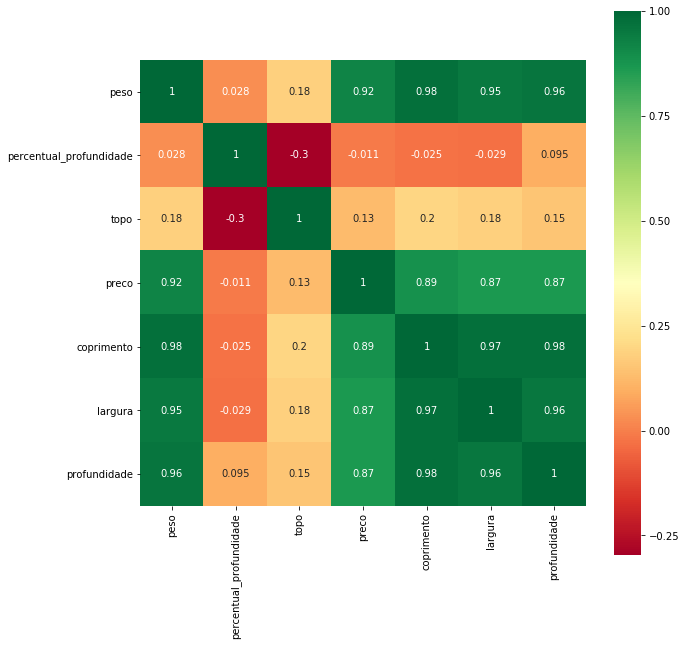

In [155]:
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### Alguns pontos a serem observados nesses gráficos:


Existem alguns recursos com pontos de dados que estão longe do resto do conjunto de dados que afetarão o resultado do nosso modelo de regressão.


- "largura" e "profundidade" têm alguns outlies dimensionais em nosso conjunto de dados que precisam ser eliminados. A "profundidade" deve ser limitada, mas devemos examinar a linha de regressão para ter certeza. A "mesa" apresentada também deve ser limitada. Vamos dar uma olhada nos gráficos de regressão para ver de perto os outliers.

### Vamos verificar se os dados têm algum valor nulo

In [156]:
data.isnull().sum()

peso                       0
corte                      0
cor                        0
clareza                    0
percentual_profundidade    0
topo                       0
preco                      0
coprimento                 0
largura                    0
profundidade               0
dtype: int64

# Dados categóricos

### Análise do Corte 

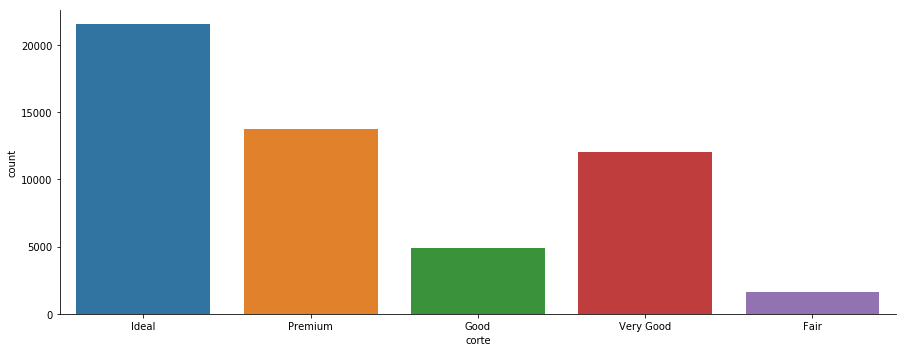

In [157]:
p = sns.catplot(x='corte', data=data , kind='count',aspect=2.5 )

### Análise do Corte em Relação ao Preço

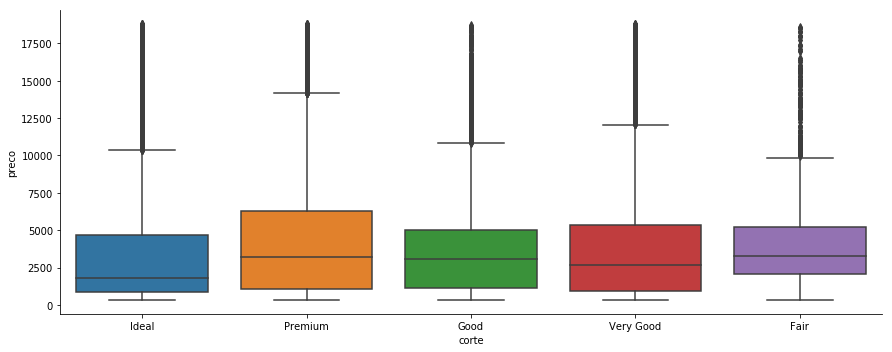

In [158]:
p = sns.catplot(x='corte', y='preco', data=data, kind='box' ,aspect=2.5 )

## Análise da Cor 

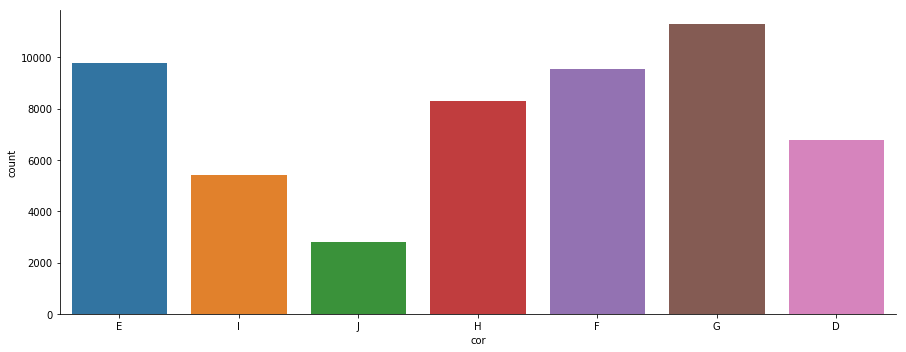

In [159]:
p = sns.catplot(x='cor', data=data , kind='count',aspect=2.5 )

### Análise da Cor em Relação ao Preço

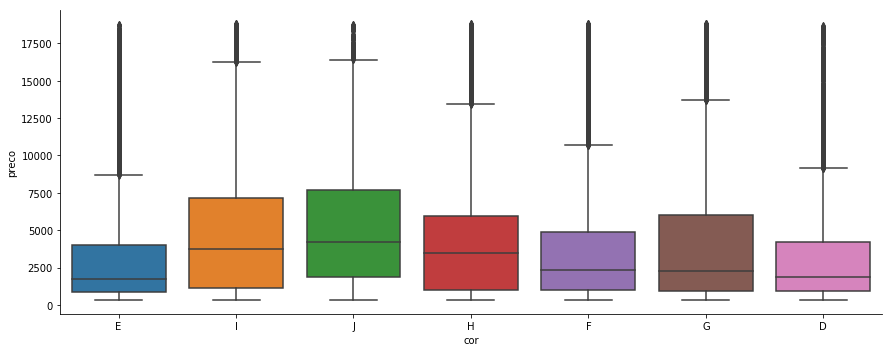

In [160]:
p = sns.catplot(x='cor', y='preco', data=data, kind='box' ,aspect=2.5 )

## Análise da Clareza

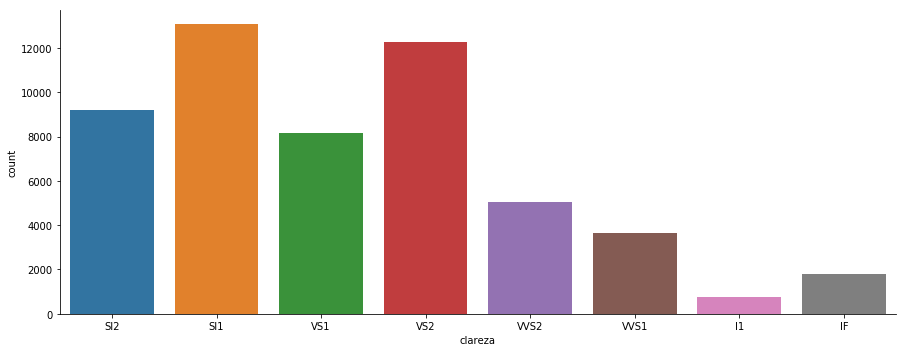

In [161]:
p = sns.catplot(x='clareza', data=data , kind='count',aspect=2.5 )

### Análise do Corte em Relação ao Preço

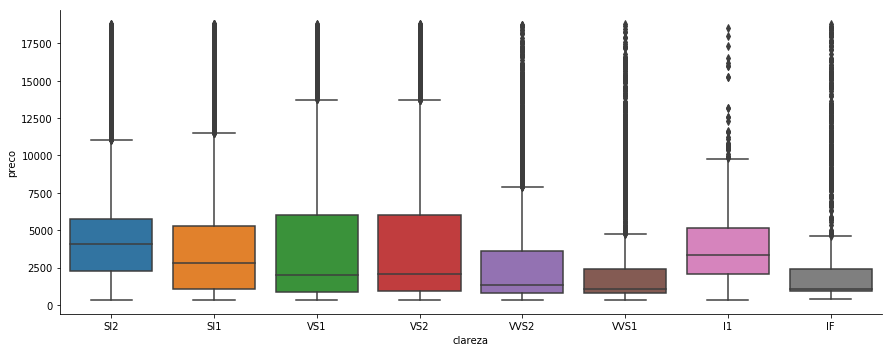

In [162]:
p = sns.catplot(x='clareza', y='preco', data=data, kind='box' ,aspect=2.5)

## Como converter dados categóricos em dados numéricos?

> Para esse problema específico utilizaremos o One-Hot Encoding

In [163]:
one_hot_encoders_diamond_data =  pd.get_dummies(data)
one_hot_encoders_diamond_data.head()

,peso,percentual_profundidade,topo,preco,coprimento,largura,profundidade,corte_Fair,corte_Good,corte_Ideal,...,cor_I,cor_J,clareza_I1,clareza_IF,clareza_SI1,clareza_SI2,clareza_VS1,clareza_VS2,clareza_VVS1,clareza_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [164]:
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns= cols)
diamond_clean_data.head()

,peso,percentual_profundidade,topo,preco,coprimento,largura,profundidade,corte_Fair,corte_Good,corte_Ideal,...,cor_I,cor_J,clareza_I1,clareza_IF,clareza_SI1,clareza_SI2,clareza_VS1,clareza_VS2,clareza_VVS1,clareza_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Ajustando a Escala dos Dados (Para Variáveis Numéricas)

In [165]:
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['peso','percentual_profundidade','coprimento','largura','profundidade','topo']]),columns=['peso','percentual_profundidade','coprimento','largura','profundidade','topo'],index=diamond_clean_data.index)

In [166]:
numericals.head()

,peso,percentual_profundidade,coprimento,largura,profundidade,topo
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [167]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['peso','percentual_profundidade','coprimento','largura','profundidade','topo']] = numericals[['peso','percentual_profundidade','coprimento','largura','profundidade','topo']]

In [168]:
diamond_clean_data_standard.head()

,peso,percentual_profundidade,topo,preco,coprimento,largura,profundidade,corte_Fair,corte_Good,corte_Ideal,...,cor_I,cor_J,clareza_I1,clareza_IF,clareza_SI1,clareza_SI2,clareza_VS1,clareza_VS2,clareza_VVS1,clareza_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Vamos dar uma olhada no mapa de calor de correlação

> Uma coisa legal é que quando plotamos antes e depois da padronização, as estatísticas ainda são as mesmas, o que é apenas mais um sinal de como a padronização é útil

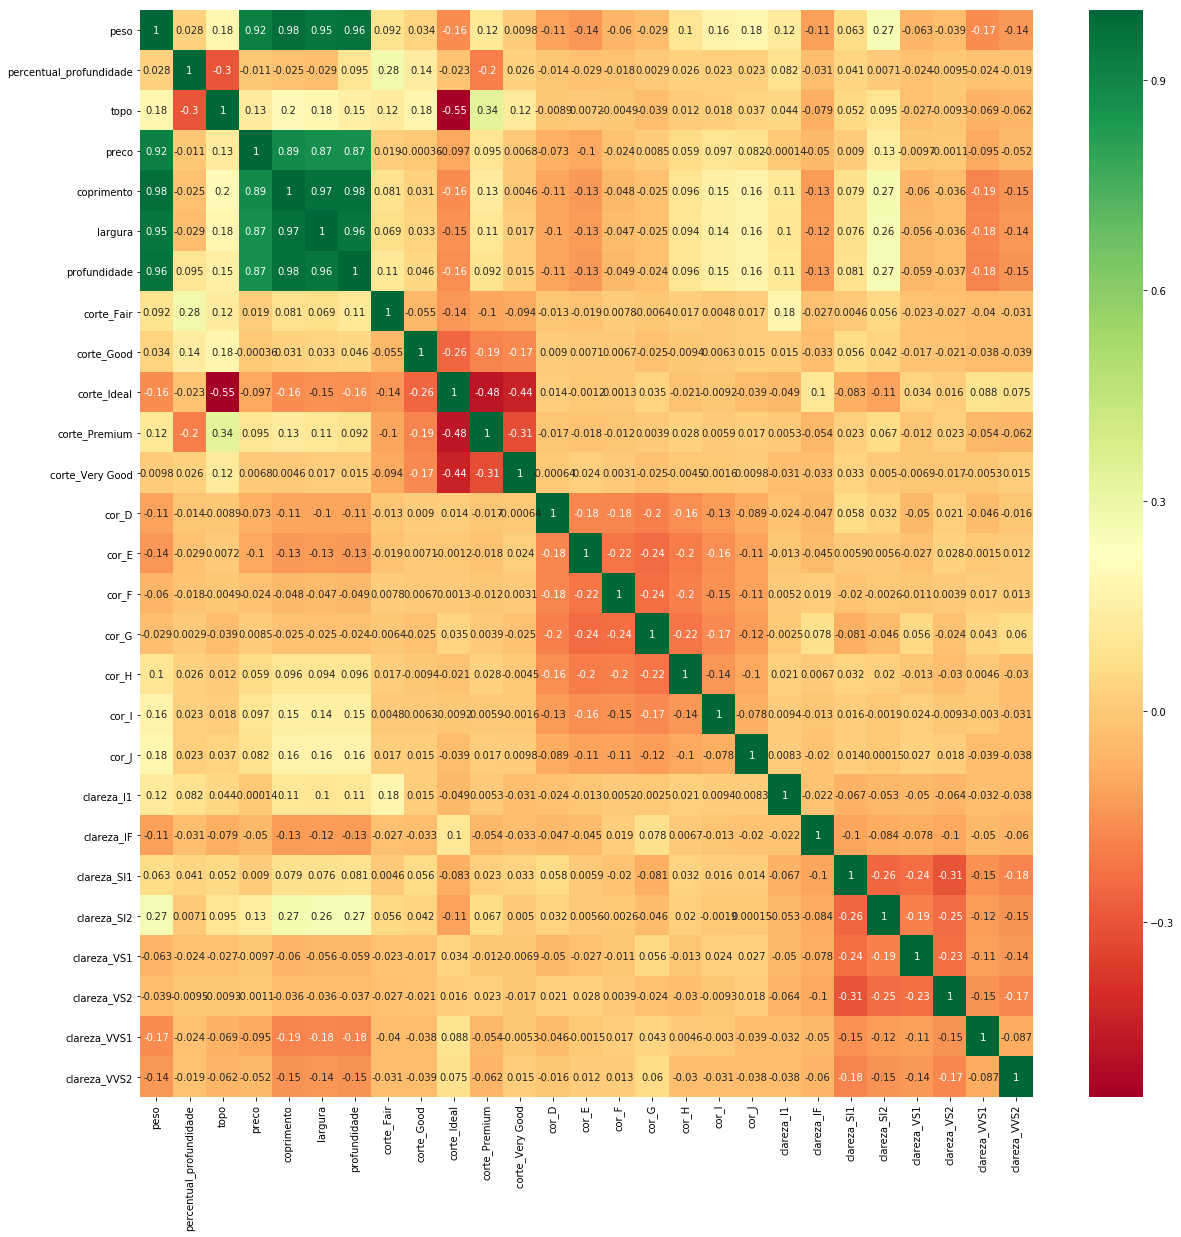

In [169]:
# Definindo o tamanho da figura
plt.figure(figsize=(20,20)) 

# Criando o mapa de calor com o Seaborn
p=sns.heatmap(diamond_clean_data.corr(), annot=True,cmap='RdYlGn')  

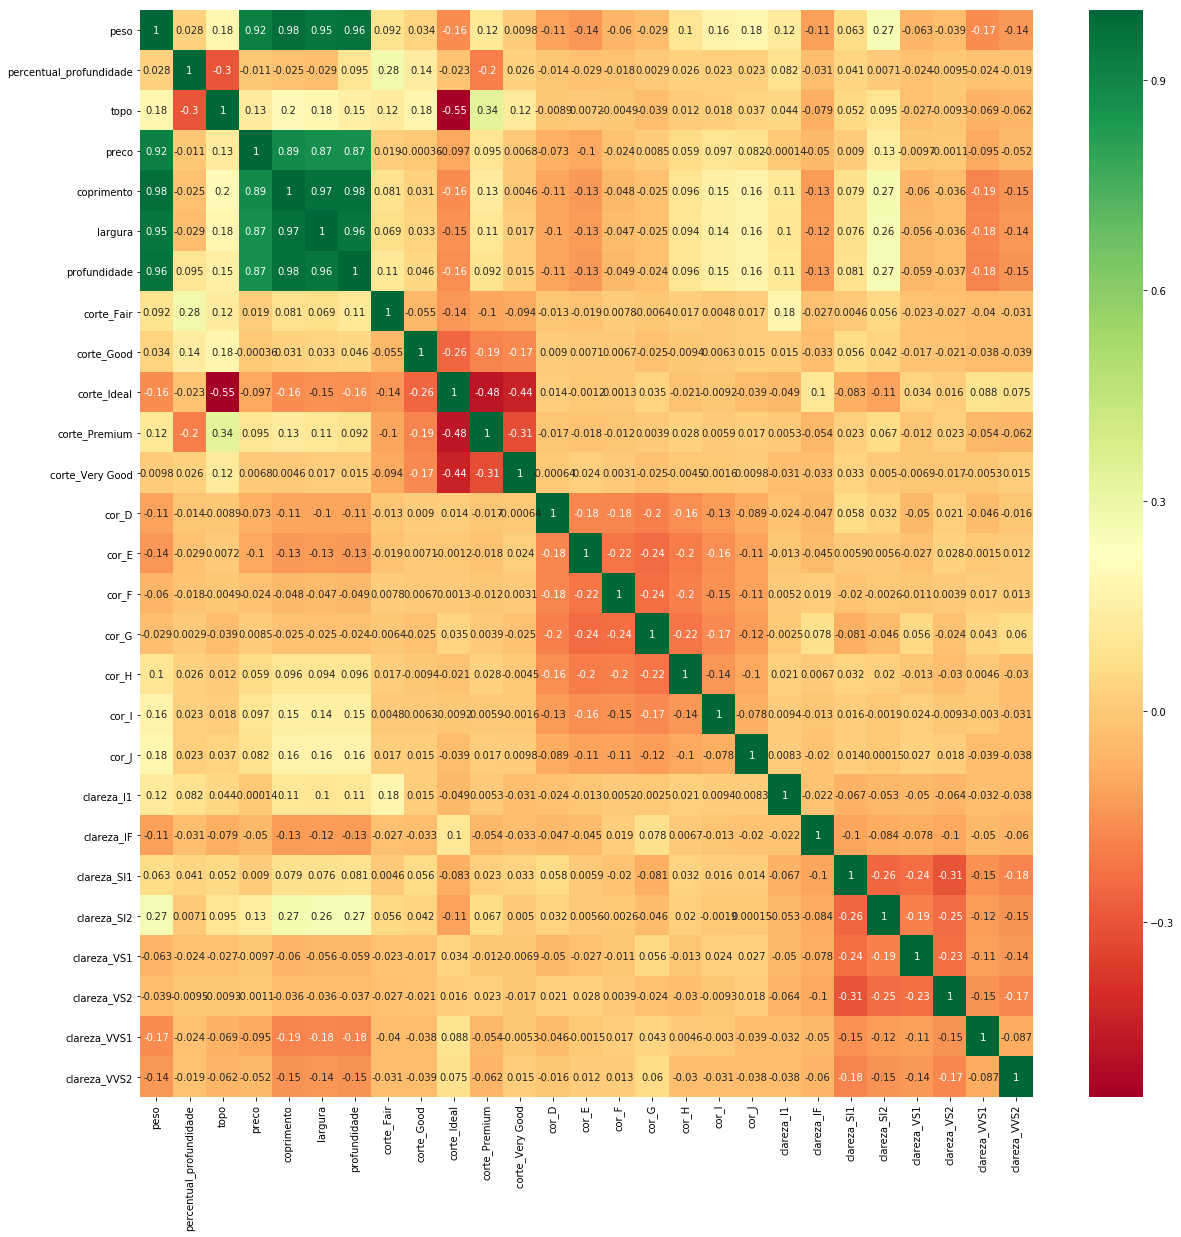

In [170]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_clean_data_standard.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

## Dividindo os Dados em Dados de Treino e Dados de Teste

In [171]:
x = diamond_clean_data_standard.drop(["preco"],axis=1)
y = diamond_clean_data_standard.preco

In [172]:
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [173]:
train_x.head()

,peso,percentual_profundidade,topo,coprimento,largura,profundidade,corte_Fair,corte_Good,corte_Ideal,corte_Premium,...,cor_I,cor_J,clareza_I1,clareza_IF,clareza_SI1,clareza_SI2,clareza_VS1,clareza_VS2,clareza_VVS1,clareza_VVS2
32286,-1.134885,0.244698,-0.204488,-1.493307,-1.416424,-1.423505,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1689,-0.079567,0.523966,-0.204488,0.061079,0.074653,0.128044,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
23658,0.954644,-0.802555,-0.204488,1.106271,1.100865,0.982107,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
51429,-0.353950,0.244698,-1.099725,-0.206918,-0.188478,-0.170879,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
11323,0.532517,-1.012006,-1.099725,0.731074,0.828963,0.640482,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Treinando o Modelo com Regressão Linear Múltipla

In [174]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("Acurácia: "+ str(regr.score(test_x,test_y)*100) + "%")
print("MAE (Mean absolute error): {}".format(mean_absolute_error(test_y,y_pred)))
print("MSE (Mean squared error): {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Acurácia: 92.21078518476793%
MAE (Mean absolute error): 731.4415989248854
MSE (Mean squared error): 1222201.224070932
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9219872757669482


## Interpretação do modelo de estatísticas e a técnica Backward Elimination

- Técnicas de Seleção em Regressão Múltipla
 
    1. Execute a regressão linear usando todas as variáveis ​​independentes.
    2. Verifique os valores p para todas as variáveis ​​independentes.
    3. Se você escolher o nível de confiança de 95%, remova a variável independente com valor p máximo e maior que 0,05.
    4. Execute novamente a regressão linear nos novos dados.
    5. Repita os passos 2 a 4 até que nenhum valor p seja maior que 0,05   


### Mas o que é o Valor p?    

In [175]:
l = list(range(0,len(diamond_clean_data_standard.columns)))

In [176]:
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['preco'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.preco, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:54:53   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.9376      6.679    343.627      0.000    2281.848    2308.028
x1          5460.7579     24.462    223.235      0.000    5412.812    5508.703
x2           -93.2107      6.644    -14.029      0.000    -106.233     -80.188
x3           -59.0772      6.491     -9.102      0.000     -71.799     -46.355
x4         -1232.1165     39.171    -31.455      0.000   -1308.893   -1155.341
x5            29.5666     22.172      1.334      0.182     -13.890      73.023
x6           -80.7768     26.583     -3.039      0.002    -132.880     -28.673
x7          -114.9354     25.534     -4.501      0.000    -164.981     -64.889
x8           459.4552     14.752     31.146      0.000     430.542     488.368
x9           709.9431     11.321     62.712      0.000     687.754     732.132
x10          638.0686     10.684     59.724      0.000     617.129     659.009
x11          602.4060     10.676     56.426      0.000     581.481     623.331
x12         1153.4995     13.106     88.015      0.000    1127.812    1179.187
x13          944.5963     11.215     84.227      0.000     922.615     966.578
x14          886.0969     11.150     79.470      0.000     864.243     907.951
x15          676.3244     10.474     64.571      0.000     655.795     696.854
x16          173.7411     11.764     14.769      0.000     150.684     196.798
x17         -316.7539     14.261    -22.211      0.000    -344.706    -288.802
x18        -1222.5666     19.366    -63.130      0.000   -1260.524   -1184.610
x19        -3532.3768     38.060    -92.810      0.000   -3606.975   -3457.778
x20         1807.9003     24.938     72.497      0.000    1759.022    1856.778
x21          145.3856     11.310     12.855      0.000     123.218     167.553
x22         -815.6870     13.012    -62.686      0.000    -841.191    -790.183
x23         1054.6669     13.015     81.034      0.000    1029.157    1080.177
x24          743.9698     11.371     65.425      0.000     721.682     766.258
x25         1471.6332     18.243     80.669      0.000    1435.877    1507.389
x26         1419.4455     15.760     90.064      0.000    1388.555    1450.336
==============================================================================
Omnibus:                    14447.606   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637923.673
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.816   Cond. No.                     1.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix 

## Eliminando variáveis do Modelo 

In [177]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['preco'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.preco, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:54:53   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53897   BIC:                         9.111e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.8033      6.678    343.643      0.000    2281.715    2307.892
x1          5461.3578     24.458    223.296      0.000    5413.420    5509.296
x2           -94.0748      6.613    -14.227      0.000    -107.036     -81.114
x3           -59.2309      6.490     -9.127      0.000     -71.951     -46.510
x4         -1208.9309     35.101    -34.441      0.000   -1277.730   -1140.132
x5           -75.5041     26.288     -2.872      0.004    -127.029     -23.980
x6          -115.9251     25.523     -4.542      0.000    -165.950     -65.900
x7           459.9913     14.746     31.194      0.000     431.089     488.894
x8           710.1280     11.320     62.733      0.000     687.941     732.315
x9           637.4627     10.674     59.721      0.000     616.542     658.384
x10          603.1463     10.662     56.572      0.000     582.250     624.043
x11         1153.4708     13.106     88.013      0.000    1127.783    1179.158
x12          944.6103     11.215     84.227      0.000     922.629     966.592
x13          886.0855     11.150     79.468      0.000     864.231     907.940
x14          676.2857     10.474     64.567      0.000     655.756     696.815
x15          173.7618     11.764     14.771      0.000     150.704     196.819
x16         -316.8024     14.261    -22.215      0.000    -344.754    -288.851
x17        -1222.6084     19.366    -63.132      0.000   -1260.566   -1184.651
x18        -3533.1209     38.056    -92.839      0.000   -3607.712   -3458.530
x19         1808.1168     24.937     72.507      0.000    1759.240    1856.994
x20          145.4078     11.310     12.857      0.000     123.240     167.575
x21         -815.6680     13.012    -62.685      0.000    -841.172    -790.164
x22         1054.8099     13.015     81.047      0.000    1029.301    1080.319
x23          743.9744     11.371     65.425      0.000     721.686     766.262
x24         1471.7206     18.243     80.674      0.000    1435.965    1507.477
x25         1419.5626     15.760     90.072      0.000    1388.672    1450.453
==============================================================================
Omnibus:                    14444.305   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638508.611
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.824   Cond. No.                     1.53e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [178]:
l.pop(5)
X = np.append(arr = np.ones((diamond_clean_data_standard.shape[0], 1)).astype(int), values = diamond_clean_data_standard.drop(['preco'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = diamond_clean_data_standard.preco, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.955e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:54:53   Log-Likelihood:            -4.5543e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53898   BIC:                         9.111e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2294.8186      6.678    343.623      0.000    2281.729    2307.908
x1          5459.4955     24.451    223.283      0.000    5411.571    5507.420
x2          -102.8447      5.866    -17.533      0.000    -114.342     -91.348
x3           -58.9383      6.490     -9.082      0.000     -71.658     -46.219
x4         -1281.1711     24.487    -52.321      0.000   -1329.165   -1233.177
x5          -115.5646     25.524     -4.528      0.000    -165.592     -65.537
x6           459.7637     14.747     31.177      0.000     430.859     488.668
x7           710.1485     11.321     62.730      0.000     687.960     732.337
x8           638.4757     10.669     59.845      0.000     617.565     659.387
x9           601.9953     10.655     56.500      0.000     581.112     622.879
x10         1153.4640     13.107     88.006      0.000    1127.775    1179.153
x11          944.3000     11.215     84.198      0.000     922.318     966.282
x12          886.0523     11.151     79.460      0.000     864.196     907.908
x13          676.2642     10.475     64.561      0.000     655.733     696.795
x14          173.8991     11.765     14.782      0.000     150.840     196.958
x15         -316.5751     14.262    -22.197      0.000    -344.528    -288.622
x16        -1222.5858     19.367    -63.127      0.000   -1260.546   -1184.626
x17        -3532.6906     38.059    -92.822      0.000   -3607.286   -3458.095
x18         1807.8109     24.939     72.490      0.000    1758.931    1856.691
x19          145.5464     11.311     12.868      0.000     123.378     167.715
x20         -815.4912     13.013    -62.667      0.000    -840.997    -789.986
x21         1054.4073     13.015     81.015      0.000    1028.898    1079.917
x22          744.0446     11.372     65.427      0.000     721.755     766.334
x23         1471.6370     18.244     80.664      0.000    1435.878    1507.395
x24         1419.5542     15.761     90.066      0.000    1388.662    1450.446
==============================================================================
Omnibus:                    14446.653   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638699.746
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.827   Cond. No.                     1.95e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [179]:
X = np.append(arr = np.ones((test_x.shape[0], 1)).astype(int), values = test_x.values, axis = 1)
X_opt = X[:, l]
y_predict = regressor_ols.predict(X_opt)

In [180]:
y_predict

array([ 119.67875241,  386.08860301, 3066.2273502 , ..., 5077.40251034,
       -832.4739701 ,  482.64537608])

In [181]:
test_y.to_numpy()

array([ 561,  544, 2323, ..., 4580,  723,  579], dtype=int64)

In [184]:
predict_df = pd.DataFrame({'Valor_Real': test_y.to_numpy().flatten(), 'Valor_Previsto': y_predict.astype('int').flatten()})

In [187]:
predict_df.head(20)

,Valor_Real,Valor_Previsto
0,561,119
1,544,386
2,2323,3066
3,4547,5034
4,3688,4455
5,2407,3034
6,2726,3292
7,7942,8035
8,918,391
9,1252,1885


In [192]:
predict_df['Valor_Previsto'] = np.where(predict_df['Valor_Previsto']<= 0, 0,predict_df['Valor_Previsto'])

In [193]:
predict_df

,Valor_Real,Valor_Previsto
0,561,119
1,544,386
2,2323,3066
3,4547,5034
4,3688,4455
5,2407,3034
6,2726,3292
7,7942,8035
8,918,391
9,1252,1885
